# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](../images/new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|










## Outline

Things we are gonna go over are
 - **Preparing the Data: ** This section will deal with things like importing the data onto python, visualizing some data values, and getting statistics of the Data.
 - **Train-Test Split: ** This section will deal with how to split up your data to Train and Test.
 - **Coding up the Model: ** In this section we will actually create the model, fit our Training Data on the model
 - **Results: ** In this section, we will use our model to make predictions on the Test Data, and evaluate its accuracy
 - **Extras: ** This section is for the Experimenter in you. This deals with extra stuff you could do.
 
So lets get started!

## Up and Running with Python Packages


For the rest of the assignment we will be using various Python Packages, namely pandas, sklearn and matplotlib.
You should install these packages if you don't already have them. For more on how to install packages in python, refer [this link](https://packaging.python.org/tutorials/installing-packages/).

## Getting the Data Ready

This is always the first step in any Machine Learning assignment, Get to **know** your data. This usually involves printing the Column Heads(First few values of every column) and plotting some of the values against others. Lets first import the data.
We will use another Python Library to do this called [Pandas](https://pandas.pydata.org/).

In [62]:
import pandas as pd #Importing the pandas package
path="../data/" #Setting up the data Directory
data=pd.read_csv(path+"lego_final.csv") #Our Data is in a Comma Separated Values(CSV) file. We read from that using pd.read_csv()
print("Number of rows and columns in the data are ", data.shape) #Print the shape of the imported data

Number of rows and columns in the data are  (12261, 10)


Lets see the Column Heads

In [63]:
data.head() #Print data head

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
0,19,29.99,2,277,4.0,0,4.5,0,4.0,20
1,19,19.99,2,168,4.0,2,5.0,0,4.0,20
2,19,12.99,11,74,4.3,2,4.3,0,4.1,20
3,5,99.99,23,1032,3.6,0,4.6,1,4.3,20
4,5,79.99,14,744,3.2,1,4.6,1,4.1,20


Lets now see some Statistics on our Data before applying any algorithms to it

In [64]:
data.describe() #Get some statistics on the data

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,3.917698,20.523367,3.609844,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,1.603276,11.990176,1.614694,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000,9.000000,3.500000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,4.600000,21.000000,4.200000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,4.900000,34.000000,4.700000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,5.000000,40.000000,5.000000,20.000000


## Setting up Training and Testing Data

Now that we have our data. Lets split up the Training and Testing parts. These terminologies, as their name suggests, are the Data Samples on which we **Train** and **Test** our Model. To draw some analogy, Think of the model as a student, Training Data as the questions in his/her Textbooks and the Test Data as the questions on his/her Exams. It is essential that Questions on Exam are different than those in his/her Textbook(Otherwise the Teacher won't be able to distinguish which set of students actually **learned** the material). The spliting of Training and Testing data can vary from Programmer to Programmer. We will split it as 80%, 20%. This means if we have 100 examples, then we will use 80 examples to come up with a hypothesis and we will use the 20 remaining examples to check how good is our hypothesis. It is also very important to shuffle the data before splitting it(Can you think why this is so?). We will use sklearn package to do all this.

Also from now on Target will refer to the quantity we are trying to predict, and Features will be the quantities used to predict the target values. Target is also called the dependent Variable and Features are called the independent variables.

In [67]:
from sklearn.utils import shuffle #Module to shuffle the data
data=shuffle(data) #Shuffle the data
X=data.drop("list_price", axis=1) #Our features will include all columns except "list_price". So we drop it
y=data["list_price"] #Our Target is "list_price"
X.head() #Print features head

,ages,num_reviews,piece_count,play_star_rating,review_difficulty,star_rating,theme_name,val_star_rating,country
5326,13,0,178,0.0,5,0.0,21,0.0,7
7055,23,4,198,4.5,0,4.5,26,5.0,10
858,19,4,740,5.0,0,5.0,6,4.3,1
6189,16,7,310,4.4,2,4.7,6,4.7,9
10978,3,2,1,5.0,5,5.0,24,5.0,17


Now that we have our features(X) and our target(Y) Separated and Shuffled, Lets split them. 

In [68]:
from sklearn.model_selection import train_test_split #Module for spliting Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #Split using train_test_split
print("Shape of X_train is ", X_train.shape) #Print shapes of the splits
print("Shape of X_test is ", X_test.shape)
print("Shape of y_train is ", y_train.shape)
print("Shape of y_test is ", y_test.shape)

Shape of X_train is  (9808, 9)
Shape of X_test is  (2453, 9)
Shape of y_train is  (9808,)
Shape of y_test is  (2453,)


## Let the Coding Begin!

Now that we have prepared our Data, Lets make a model out of it. But First, 

What is **Supervised Learning**?

Lets say there is a function $ f(x) $, 
and I am telling you that

$ f(1) = 2 $

$ f(2) = 3 $

$ f(3) = 4 $

$ ... $

$ f(100) = 101 $

Now if I ask you, What do you think will be the value of $ f(101) $? 

Most of you would say $ 102 $. 

What you did was you **approximated** $ f(x) $ as $ f(x) = x+1 $ .This is Supervised Learning. 

Or, as [Wikipedia](https://en.wikipedia.org/wiki/Supervised_learning) says
>Supervised learning is the machine learning task of learning a function that maps an input to an output based on example input-output pairs

The simplest class of functions is Linear functions.(*How complicated can straight lines get anyway?*)

Therefore we will consider a Supervised Learning technique called **Linear Regression**.

Linear Regression tries to **fit** the target as a Linear function of the features.

Mathematically,

$ h_\theta(x) = \theta_0 * x_0 + \theta_1 * x_1 + \theta_2 * x_2 + ...  + \theta_n * x_n $

$ x_0 = 1$

In the above Example, we tried to fit $ f(x) = x + 1 $

What is a **Cost Function**?

Since we are only Trying to approximate the function, it must be a little off from the original value of the Target. Cost function is a function which measures this deviation. Since we would like our approximation to get as close to the actual values of the target, we would like to minimize the cost Function. 

Our **Cost function** will be,

$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 $

i.e **Mean Squared Error**

In [69]:
from sklearn.linear_model import LinearRegression #Import the module for Linear Regression Model
model=LinearRegression() # create a model instance
model.fit(X_train, y_train) #fit the training values onto the model 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Although we let sklearn do all the work for us, What is happening behind the scenes is that sklearn is setting the parameters($ \theta_i $) to some initial value.

Now it is trying to find the best values of parameters(Such that the cost function for those parameters is close to its minimum value)

One such algorithm is called **Gradient Descent**, the algorithm is

repeat until convergence {

>$ \theta_j = \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta) $

}

$ \frac{\partial}{\partial \theta_j} J(\theta) = \frac{1}{m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} $



## Report Card

Now that we have successfully trained our model, Lets see how well we have done.

In [70]:
y_pred=model.predict(X_test) #Getting predictions on X_test

In [83]:
from sklearn.metrics import mean_squared_error #import module for MSE(Mean Squared Error)
print("Mean Squared Error is ", mean_squared_error(y_test, y_pred)) #print MSE

Mean Squared Error is  1744.3674819605085


In [84]:
from sklearn.metrics import r2_score #import module for r-squared score
print("r-squared Score is ", r2_score(y_test, y_pred)) #print r-squared score

r-squared Score is  0.8240573151212669


r-squared is a test of how good the model is performing. More is the value, better is the model. The max value of r-squared is 1. 

Not bad! Given the simplicity of the model.

Now lets see the Parameters our Model Learned.
The $ \theta_1, \theta_2, ... \theta_n $ are

In [73]:
model.coef_ #print model parameteres

array([ -0.81788111,  -0.0957047 ,   0.09726901,  16.67649675,
        -3.15059508,  -1.43595711,   0.42978446, -19.06275495,
         0.18607391])

The intercept or $ \theta_0 $ is

In [74]:
model.intercept_ #print model intercept

40.32284790554981

## Lets Plot the Results

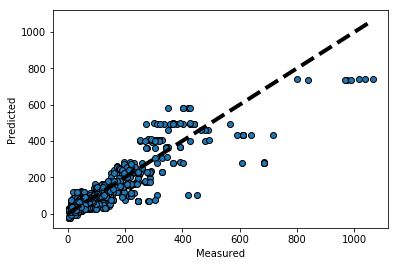

In [82]:
import matplotlib.pyplot as plt #import module to plot the values
%matplotlib inline
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## What's Next?

You have made a basic Machine Learning model. Yay!

But an r-squared score of 0.82 doesn't guarantee that you will be able to buy all the Lego sets! 

Things you could try

 - Change the train, test split (70, 30 for example) and note changes in accuracy
 
 - Try getting [Correlations](https://www.datascience.com/learn-data-science/fundamentals/introduction-to-correlation-python-data-science) among columns in X and target(Y) . For example,Intutively I dont think num_reviews has a lot of dependance on the price. So deleting features like these can help increase the accuracy of our model.
 
 - [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering) Maybe price depends more on the square of piece_count rather than the value of piece_count. Try squaring a few columns and see the changes in the accuracy. This is called **Polynomial Regression**.
 
 - [Data Preprocessing](http://scikit-learn.org/stable/modules/preprocessing.html) Try methods like **Feature Scaling** and **Mean Normalization**
 
 - Read up about [Regularization](https://www.quora.com/What-is-regularization-in-machine-learning) and try using the [RidgeRegressor()](http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression) instead of Linear Regression
 
 - If you are comfortable enough with Python and Linear Algebra and Multivariable Calculus then you can code up a Linear Regressor from Scratch. Implement the Gradient Descent algorithm and try Experimenting with things like Learning Rate, and No. of Iterations.
 
**Note :**  A Python package called **NumPy** might turn out to be very useful to clear these extra tasks. Here is a good [tutorial](http://cs231n.github.io/python-numpy-tutorial/) on NumPy to get you started. 

Happy Machine Learning!!